# 可选实验室：多变量线性回归

在本实验中，您将扩展数据结构和以前开发的例程以支持多种功能。更新了一些例程，使实验室显得冗长，但它对以前的例程进行了细微调整，使其可以快速回顾。

# 大纲

- [1.1 目标]()
- [1.2 工具]()
- [1.3 表示法]()
- [2 问题陈述]()
- [&nbsp;&nbsp;2.1 矩阵X包含我们的示例]()
- [&nbsp;&nbsp;2.2 参数向量w, b]()
- [3 多变量模型预测]()
- [&nbsp;&nbsp;3.1 逐个元素的单预测]()
- [&nbsp;&nbsp;3.2 单预测，向量]()
- [4 多个变量的计算成本]()
- [5 个多变量梯度下降]()
- [5.1 计算多变量梯度]()
- [5.2 多变量梯度下降]()
- [6 恭喜]()

## 1.1 目标
- 扩展我们的回归模型例程以支持多种功能
  - 扩展数据结构以支持多种功能
  - 重写预测、成本和梯度例程以支持多种功能
  - 利用NumPy`np.dot`对其实现进行矢量化，以提高速度和简单性

## 1.2 工具
在本实验中，我们将利用：
- NumPy，一个流行的科学计算库
- Matplotlib，一个流行的绘制数据的库

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('deeplearning.mplstyle')
np.set_printoptions(precision=2)

## 1.3 符号

以下是您将遇到的一些符号的摘要，并针对多个功能进行了更新。

| 一般表示法                                | 描述                                                                                                                            | Python（如果适用）  |
|:-------------------------------------|:------------------------------------------------------------------------------------------------------------------------------|---------------|
| $a$                                  | 标量，非粗体                                                                                                                        |               |
| $\mathbf{a}$                         | 矢量，粗体                                                                                                                         |               |
| $\mathbf{A}$                         | 矩阵，粗体大写                                                                                                                       |               |
| **回归**                               |                                                                                                                               |               | |
| $\mathbf{X}$                         | 训练示例 maxtrix                                                                                                                  | `X_train`     |
| $\mathbf{y}$                         | 训练示例目标                                                                                                                        | `y_train`     |
| $\mathbf{x}^{(i)}$, $y^{(i)}$        | $i_{th}$训练示例                                                                                                                  | `X[i]`，`y[i]` |
| 米                                    | 训练样本数量                                                                                                                        | `米`           |
| n                                    | 每个示例中的特征数量                                                                                                                    | `n`           |
| $\mathbf{w}$                         | 参数：重量，                                                                                                                        | `w`           |
| $b$                                  | 参数：偏差                                                                                                                         | `b`           |
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | 由 $\mathbf{w},b$ 参数化的 $\mathbf{x^{(i)}}$ 处的模型评估结果：$f_{\mathbf{w},b}(\mathbf{x}^ {(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$ | `f_wb`        |

#2 问题陈述

您将使用房价预测的激励示例。训练数据集包含三个示例，具有四个特征（大小、卧室、楼层和年龄），如下表所示。请注意，与早期的实验室不同，尺寸单位为平方英尺，而不是1000平方英尺。这会导致一个问题，您将在下一个实验中解决该问题！

| 尺寸（平方英尺） | 卧室数量 | 楼层数 | 家庭时代 | 价格（千元） |
|----------|------|-----|------|--------|
| 2104     | 5    | 1   | 45   | 460    | 
| 1416     | 3    | 2   | 40   | 232    | 
| 852      | 2    | 1   | 35   | 178    |

您将使用这些值构建线性回归模型，以便您可以预测其他房屋的价格。例如，一套1200平方英尺、3间卧室、1层、40年的房子。

请运行以下代码单元来创建`X_train`和`y_train`变量。

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

## 2.1 包含我们示例的矩阵X

与上表类似，示例存储在NumPy矩阵`X_train`中。矩阵的每一行代表一个示例。当您有$m$个训练样本（在我们的示例中$m$为3个），并且有$n$个特征（在我们的示例中为4个）时，$\mathbf{X}$是一个维度为（$m$, $n$）（m行，n列）。

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

符号：
- $\mathbf{x}^{(i)}$是包含示例i的向量。$\mathbf{x}^{(i)}$$=(x^{(i)}_0,x^{(i)}_1,\cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$是示例i中的元素j。括号中的上标表示示例编号，下标表示元素。

显示输入数据。

In [4]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## 2.2 参数向量w，b

* $\mathbf{w}$是一个包含$n$个元素的向量。
   - 每个元素包含与一个特征相关的参数。
   - 在我们的数据集中，n是4。
   - 理论上，我们将其绘制为列向量

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$

* $b$是标量参数。

为了演示，$\mathbf{w}$和$b$将加载一些接近最佳值的初始选定值。$\mathbf{w}$是一个一维NumPy向量。

In [5]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# 3 多变量模型预测
具有多个变量的模型预测由线性模型给出：

$$f_{\mathbf{w},b}(\mathbf{x})=w_0x_0+w_1x_1+\cdots +w_{n-1}x_{n-1}+b\tag{1}$$

或用向量表示法：

$$f_{\mathbf{w},b}(\mathbf{x})=\mathbf{w}\cdot\mathbf{x}+b\tag{2}$$

其中$\cdot$是向量`点积`

为了演示点积，我们将使用（1）和（2）来实现预测。

## 3.1 逐个元素的单预测

我们之前的预测将一个特征值乘以一个参数，并添加一个偏差参数。我们之前对多个特征的预测实现的直接扩展是使用每个元素上的循环来实现上面的（1），与其参数执行乘法，然后在最后添加偏差参数。

In [6]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [7]:
x_vec = X_train[0, :]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


注意`x_vec`的形状。 它是一个具有4个元素(4,)的一维NumPy向量。 结果`f_wb`是一个标量。

## 3.2 单次预测，向量

注意，上面的等式（1）可以使用上面（2）中的点积来实现。我们可以利用向量运算来加速预测。

回想一下Python/Numpy实验室，NumPy`np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)]可用于执行向量点积。

In [8]:
def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

In [9]:
x_vec = X_train[0, :]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


结果和形状与使用循环的先前版本相同。今后，`np.dot`将用于这些操作。该预测现在是一个单一的陈述。大多数例程将直接实现它，而不是调用单独的预测例程。

# 4 计算多变量成本

多变量成本函数$J(\mathbf{w},b)$的方程为：

$$J(\mathbf{w},b)=\frac{1}{2m}\sum\limits_{i = 0}^{m-1}(f_{\mathbf{w},b}(\mathbf {x}^{(i)})-y^{(i)})^2\tag{3}$$

在哪里：

$$f_{\mathbf{w},b}(\mathbf{x}^{(i)})=\mathbf{w}\cdot\mathbf{x}^{(i)}+b\tag{4}$$

与之前的实验相反，$\mathbf{w}$和$\mathbf{x}^{(i)}$是向量而不是支持多个特征的标量。

下面是等式（3）和（4）的实现。请注意，这使用了*本课程的标准模式*，其中使用了所有`m`示例的for循环。

In [10]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

In [11]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'最佳成本：{cost}')

最佳成本：1.5578904045996674e-12


**预期结果**：最佳成本w：1.5578904045996674e-12

# 5 多变量梯度下降

多变量的梯度下降：

重复直到收敛

$$w_j=w_j-\alpha\frac{\partial J(\mathbf{w},b)}{\partial w_j}\tag{5}\;\text{for j=0,1,\cdots,n-1}$$
$$b=b-\alpha\frac{\partial J(\mathbf{w},b)}{\partial b}$$

其中，n是特征数量，参数$w_j$、$b$同时更新，其中

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$

* m是数据集中训练样本的数量

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$是模型的预测，而$y^{(i)}$是目标值

## 5.1 计算多变量梯度

计算方程（6）和（7）的实现如下。有很多方法可以实现这一点。在这个版本中，有一个

- 所有m个示例的外循环。
     - $\frac{\partial J(\mathbf{w},b)}{\partial b}$的例子可以直接计算并累加
     - 在所有n个特征的第二个循环中：
         - 对每个$w_j$计算$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$。

In [12]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [13]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db初始w、b：{tmp_dj_db}')
print(f'dj_dw初始w、b：{tmp_dj_dw}')

dj_db初始w、b：-1.6739251122999121e-06
dj_dw初始w、b：[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


**预期结果**：

dj_db初始w、b：-1.6739251122999121e-06

dj_dw初始w、b：[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]

## 5.2 多变量梯度下降

下面的例程实现了上面的等式（5）。

In [14]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        j_history.append(cost_function(x, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    return w, b, j_history

在下一个单元中，您将测试实现。

In [15]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient,
                                            alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m, _ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration 100000: Cost   563.25   
Iteration 200000: Cost   550.05   
Iteration 300000: Cost   537.17   
Iteration 400000: Cost   524.59   
Iteration 500000: Cost   512.31   
Iteration 600000: Cost   500.31   
Iteration 700000: Cost   488.60   
Iteration 800000: Cost   477.16   
Iteration 900000: Cost   465.99   
b,w found by gradient descent: 0.09,[ 0.23  2.63 -7.41 -1.25] 
prediction: 441.53, target value: 460
prediction: 274.24, target value: 232
prediction: 153.41, target value: 178


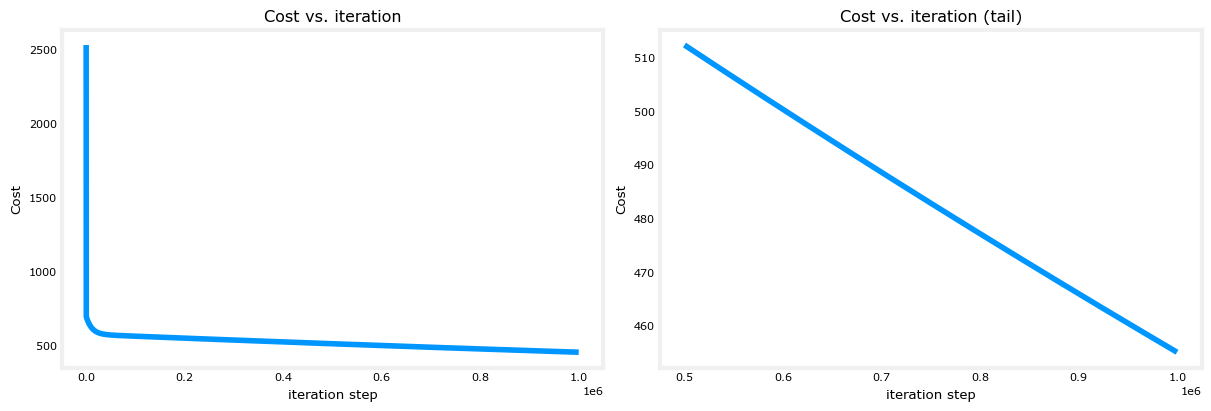

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(500000 + np.arange(len(J_hist[500000:])), J_hist[500000:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

*这些结果并不鼓舞人心*！成本仍在下降，我们的预测也不是很准确。下一个实验室将探讨如何改进这一点。

# 6 恭喜！

在本实验室中，您：

- 重新开发了线性回归例程，现在具有多个变量。
- 利用NumPy`np.dot`对实现进行矢量化